In [1]:
import os
import time
from io import StringIO
import subprocess
import plotnine
import pandas as pd
import numpy as np

In [2]:
base_dir="/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/output/tara-eukulele-mapping/EUKulele_assembly_mapping"
eukulele_paths=os.listdir(os.path.join(base_dir))

In [3]:
coverm_dir="/vortexfs1/scratch/akrinos/2022-euk-diversity-phaeo-contigs"#/SPO-all-SRF-5-20.00/coverm/"
step1=pd.read_csv(os.path.join(coverm_dir,curr_path,"coverm","phaeo_abund.out"),
            sep="\t")#.pivot(index="Sample",columns="Type",values="FileSize_MB")
step1["TotalAll"] = step1.loc[:,[("phaeo_contigs" in curr) for curr in step1.columns]].sum(axis=1)

NameError: name 'curr_path' is not defined

In [8]:
os.path.isfile(os.path.join(coverm_dir,curr_path,"coverm","phaeo_abund.out"))

False

In [ ]:
step1

In [3]:
coverm_dir="/vortexfs1/scratch/akrinos/2022-euk-diversity-phaeo-contigs"
all_phaeo_seqs = pd.DataFrame()
for curr_path in eukulele_paths:
    if not os.path.isfile(os.path.join(coverm_dir,curr_path,"coverm","phaeo_abund.out")):
        continue
    curr_all_combo = pd.DataFrame()
    if os.path.getsize(os.path.join(coverm_dir,curr_path,"coverm","phaeo_abund.out")) == 0:
        continue
    step1=pd.read_csv(os.path.join(coverm_dir,curr_path,"coverm","phaeo_abund.out"),
        sep="\t")
    step1["TotalAll"] = step1.loc[:,[("phaeo_contigs" in curr) for curr in step1.columns]].sum(axis=1)
    for curr_path_2 in os.listdir(os.path.join(base_dir,curr_path)):
        if not (os.path.isdir(os.path.join(base_dir, curr_path, curr_path_2, "taxonomy_estimation"))):
            continue
        tax_est_file = os.path.join(base_dir, curr_path, curr_path_2, "taxonomy_estimation",
                                    "proteins-estimated-taxonomy.out")
        output = subprocess.check_output(" ".join(["cat", tax_est_file, "| { grep Phaeocystis || true; }"]),
                                          shell=True).decode("utf-8").split("\n")
        TESTDATA = StringIO("\n".join(output))
        df = pd.read_csv(TESTDATA, sep="\t", header=None,names=["transcript_name","classification_level",
                                                        "full_classification","classification",
                                                        "max_pid","ambiguous","counts"])
        df["contig_name"] = ["_".join(curr.split("_")[0:2]) for curr in df["transcript_name"]]
        df = df.merge(step1.loc[:,["Contig","TotalAll"]],left_on="contig_name",
                      right_on="Contig",how="left")
        tara_sample=curr_path
        phaeo_curr=curr_path_2
        df["PhaeoDB"]=phaeo_curr
        df["TaraSample"]=curr_path
        all_phaeo_seqs = pd.concat([all_phaeo_seqs,df])

CalledProcessError: Command 'cat /vortexfs1/omics/alexander/akrinos/2022-euk-diversity/output/tara-eukulele-mapping/EUKulele_assembly_mapping/NAO-all-MIX-0.8-5.00/P_antarctica_caron/taxonomy_estimation/proteins-estimated-taxonomy.out | { grep Phaeocystis || true; }' died with <Signals.SIGINT: 2>.

In [5]:
step1.head()

,Contig,phaeo_contigs.dedup.fasta/ERR1700890_1.trimmed.fastq.gz Mean,phaeo_contigs.dedup.fasta/ERR1700890_1.trimmed.fastq.gz RPKM,phaeo_contigs.dedup.fasta/ERR1700890_1.trimmed.fastq.gz TPM,phaeo_contigs.dedup.fasta/ERR1700899_1.trimmed.fastq.gz Mean,phaeo_contigs.dedup.fasta/ERR1700899_1.trimmed.fastq.gz RPKM,phaeo_contigs.dedup.fasta/ERR1700899_1.trimmed.fastq.gz TPM,phaeo_contigs.dedup.fasta/ERR1726575_1.trimmed.fastq.gz Mean,phaeo_contigs.dedup.fasta/ERR1726575_1.trimmed.fastq.gz RPKM,phaeo_contigs.dedup.fasta/ERR1726575_1.trimmed.fastq.gz TPM,...,phaeo_contigs.dedup.fasta/ERR599218_1.trimmed.fastq.gz Mean,phaeo_contigs.dedup.fasta/ERR599218_1.trimmed.fastq.gz RPKM,phaeo_contigs.dedup.fasta/ERR599218_1.trimmed.fastq.gz TPM,phaeo_contigs.dedup.fasta/ERR599222_1.trimmed.fastq.gz Mean,phaeo_contigs.dedup.fasta/ERR599222_1.trimmed.fastq.gz RPKM,phaeo_contigs.dedup.fasta/ERR599222_1.trimmed.fastq.gz TPM,phaeo_contigs.dedup.fasta/ERR599282_1.trimmed.fastq.gz Mean,phaeo_contigs.dedup.fasta/ERR599282_1.trimmed.fastq.gz RPKM,phaeo_contigs.dedup.fasta/ERR599282_1.trimmed.fastq.gz TPM,TotalAll
0,k119_813,0.005525,0.431014,1.031185,0.001381,0.016251,0.044680,0.501381,25.067411,64.023060,...,17.852901,5.222713,20.276161,0.024171,1.527328,4.741707,0.275552,22.939457,52.154880,625.952893
1,k119_953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180150,0.109524,0.279728,...,13.421053,2.648761,10.283292,1.177444,0.378900,1.176324,0.000000,0.000000,0.000000,32.979175
2,k119_1181,0.000000,0.160397,0.383744,0.000000,0.013910,0.038242,13.145603,317.273740,810.328300,...,0.005824,2.652186,10.296589,0.003494,0.567630,1.762251,0.464764,520.243300,1182.818800,8503.213459
3,k119_1994,0.081976,0.030066,0.071933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.597720,1.513506,5.875891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.053857
4,k119_2208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.023370,0.584597,2.269585,3.186962,0.958359,2.975304,1.833333,1.038944,2.362127,25.842952


In [11]:
all_phaeo_seqs.loc[all_phaeo_seqs.TotalAll!=all_phaeo_seqs.TotalAll,:]

,transcript_name,classification_level,full_classification,classification,max_pid,ambiguous,counts,contig_name,Contig,TotalAll,PhaeoDB,TaraSample
18845,k119_18668342_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,46.657,0,NaN,k119_18668342,NaN,NaN,P_cordata_ccmp3104,NAO-all-SRF-0.8-5.00
3149,k119_12830790_1,species,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis globosa,50.828,0,NaN,k119_12830790,NaN,NaN,P_globosa_ccmp1528,NAO-all-SRF-0.8-5.00
21842,k119_18668342_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,46.657,0,NaN,k119_18668342,NaN,NaN,free_phaeo,NAO-all-SRF-0.8-5.00
7648,k119_12830790_1,species,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis colonies,50.828,0,NaN,k119_12830790,NaN,NaN,colonies_phaeo,NAO-all-SRF-0.8-5.00
5778,k119_1276821_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,44.426,0,NaN,k119_1276821,NaN,NaN,P_ant_jgi,SO-all-SRF-20-180.00
37637,k119_2084682_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,50.44,0,NaN,k119_2084682,NaN,NaN,colonies_phaeo,SO-all-DCM-180-2000.00
11137,k119_1789728_4,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,46.657,0,NaN,k119_1789728,NaN,NaN,P_globosa_jgi,SO-all-SRF-180-2000.00
296,k119_6651955_2,species,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis free,46.657,0,NaN,k119_6651955,NaN,NaN,free_phaeo,NAO-all-SRF-5-20.00
258,k119_6651955_2,species,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis jahnii,46.657,0,NaN,k119_6651955,NaN,NaN,P_jahnii_ccmp2496,NAO-all-SRF-5-20.00
14344,k119_25026033_2,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,65.766,0,NaN,k119_25026033,NaN,NaN,P_ant_jgi,SPO-all-DCM-0.8-5.00


In [6]:
pd.set_option('display.max_rows', 500)

all_phaeo_seqs.drop_duplicates(subset=["TaraSample","PhaeoDB","classification","transcript_name"]).\
    groupby(["TaraSample","PhaeoDB"])["classification"].count().reset_index().sort_values("PhaeoDB").tail(n=500)

,TaraSample,PhaeoDB,classification
140,MS-all-DCM-180-2000.00,P_globosa_jgi,4
153,MS-all-DCM-20-180.00,P_globosa_jgi,19
290,NAO-all-MIX-0.8-5.00,P_globosa_jgi,29549
597,SAO-all-DCM-20-180.00,P_globosa_jgi,14
814,SPO-all-DCM-180-2000.00,P_globosa_jgi,10
166,MS-all-DCM-5-20.00,P_globosa_jgi,11
115,IO-all-SRF-5-20.00,P_globosa_jgi,5
179,MS-all-SRF-0.8-5.00,P_globosa_jgi,28188
622,SAO-all-MES-0.8-5.00,P_globosa_jgi,3
192,MS-all-SRF-180-2000.00,P_globosa_jgi,10


In [7]:
counted_by_samp = all_phaeo_seqs.drop_duplicates(subset=["transcript_name",
                                                         "TaraSample"]).\
                    groupby("TaraSample")["classification"].count().reset_index().\
    rename({"classification":"TotalBySamp"},axis="columns")

In [8]:
all_phaeo_seqs

,transcript_name,classification_level,full_classification,classification,max_pid,ambiguous,counts,contig_name,Contig,TotalAll,PhaeoDB,TaraSample
0,k119_10449_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,182.36,0,NaN,k119_10449,k119_10449,16.638641,P_ant_jgi,SPO-all-SRF-0.8-5.00
1,k119_105862_2,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,90.404,0,NaN,k119_105862,k119_105862,30.603673,P_ant_jgi,SPO-all-SRF-0.8-5.00
2,k119_108681_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,123.19,0,NaN,k119_108681,k119_108681,5.056190,P_ant_jgi,SPO-all-SRF-0.8-5.00
3,k119_109578_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,759.51,0,NaN,k119_109578,k119_109578,157.170350,P_ant_jgi,SPO-all-SRF-0.8-5.00
4,k119_109578_2,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,47.433,0,NaN,k119_109578,k119_109578,157.170350,P_ant_jgi,SPO-all-SRF-0.8-5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3,k119_4272034_3,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,161.02,0,NaN,k119_4272034,k119_4272034,31.969678,P_rex_ccmp2000,IO-all-SRF-5-20.00
4,k119_4396874_2,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,245.41,0,NaN,k119_4396874,k119_4396874,631.789339,P_rex_ccmp2000,IO-all-SRF-5-20.00
5,k119_6304328_3,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,251.23,0,NaN,k119_6304328,k119_6304328,78.951567,P_rex_ccmp2000,IO-all-SRF-5-20.00
6,k119_6377828_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,253.17,0,NaN,k119_6377828,k119_6377828,121.062792,P_rex_ccmp2000,IO-all-SRF-5-20.00


In [9]:
grouped_counted_seqs = all_phaeo_seqs.loc[[(curr in ["phaeo_all","free_phaeo","colonies_phaeo"]) \
                    for curr in all_phaeo_seqs.PhaeoDB],:].groupby(["PhaeoDB",
                                                                    "TaraSample"])\
    ["classification"].count().reset_index()
grouped_counted_seqs["ShortCode"] = [curr.split("-")[0] for curr in grouped_counted_seqs.TaraSample]
grouped_counted_seqs["Depth"] = [curr.split("-")[2] for curr in grouped_counted_seqs.TaraSample]
grouped_counted_seqs["SizeFract"] = ["Small" if "0.8-5" in curr else "Mid" if "5-20" in curr\
                                     else "Large" if "20-" in curr else "Largest" \
                                     for curr in grouped_counted_seqs.TaraSample]

In [10]:
all_phaeo_seqs.head()

,transcript_name,classification_level,full_classification,classification,max_pid,ambiguous,counts,contig_name,Contig,TotalAll,PhaeoDB,TaraSample
0,k119_10449_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,182.36,0,NaN,k119_10449,k119_10449,16.638641,P_ant_jgi,SPO-all-SRF-0.8-5.00
1,k119_105862_2,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,90.404,0,NaN,k119_105862,k119_105862,30.603673,P_ant_jgi,SPO-all-SRF-0.8-5.00
2,k119_108681_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,123.19,0,NaN,k119_108681,k119_108681,5.056190,P_ant_jgi,SPO-all-SRF-0.8-5.00
3,k119_109578_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,759.51,0,NaN,k119_109578,k119_109578,157.170350,P_ant_jgi,SPO-all-SRF-0.8-5.00
4,k119_109578_2,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,47.433,0,NaN,k119_109578,k119_109578,157.170350,P_ant_jgi,SPO-all-SRF-0.8-5.00


In [11]:
grouped_counted_seqs_abund = all_phaeo_seqs.loc[[(curr in ["phaeo_all","free_phaeo","colonies_phaeo"]) \
                    for curr in all_phaeo_seqs.PhaeoDB],:].fillna(0).groupby(["PhaeoDB",
                                                                    "TaraSample"])\
    ["TotalAll"].sum().reset_index()
grouped_counted_seqs_abund["ShortCode"] = [curr.split("-")[0] for curr in grouped_counted_seqs_abund.TaraSample]
grouped_counted_seqs_abund["Depth"] = [curr.split("-")[2] for curr in grouped_counted_seqs_abund.TaraSample]
grouped_counted_seqs_abund["SizeFract"] = ["Small" if "0.8-5" in curr else "Mid" if "5-20" in curr\
                                     else "Large" if "20-" in curr else "Largest" \
                                     for curr in grouped_counted_seqs_abund.TaraSample]

In [12]:
grouped_counted_seqs_abund.head()

,PhaeoDB,TaraSample,TotalAll,ShortCode,Depth,SizeFract
0,colonies_phaeo,IO-all-DCM-0.8-5.00,2.480346e+06,IO,DCM,Small
1,colonies_phaeo,IO-all-DCM-180-2000.00,1.232670e+05,IO,DCM,Largest
2,colonies_phaeo,IO-all-DCM-20-180.00,5.239187e+04,IO,DCM,Large
3,colonies_phaeo,IO-all-DCM-5-20.00,1.720133e+04,IO,DCM,Mid
4,colonies_phaeo,IO-all-FSW-0.8-5.00,2.609042e+03,IO,FSW,Small


In [13]:
grouped_counted_seqs.to_csv("short_code_abund_24Apr.csv")

In [14]:
grouped_counted_seqs_abund.to_csv("short_code_abund_mean_cov_24Apr.csv")

In [32]:
all_phaeo_seqs.groupby(["classification","PhaeoDB"]).count()

transcript_name  \
classification         PhaeoDB                                  
Phaeocystis            P_ant_jgi                       426771   
                       P_antarctica_caron              319457   
                       P_antarctica_ccmp1374           173745   
                       P_cordata_ccmp3104              220813   
                       P_globosa_ccmp1528              209234   
                       P_globosa_jgi                   473344   
                       P_jahnii_ccmp2496               144499   
                       P_pouchetii_CCB                 543331   
                       P_rex_ccmp2000                   16072   
                       P_sp_ccmp2710                   140999   
                       colonies_phaeo                  666889   
                       free_phaeo                      299468   
                       phaeo_all                      1010308   
Phaeocystis antarctica P_ant_jgi                       194432   
                       P_antarctica_caron              144801   
                       P_antarctica_ccmp1374            83015   
                       phaeo_all                       146794   
Phaeocystis colonies   colonies_phaeo                  360350   
Phaeocystis cordata    P_cordata_ccmp3104              277650   
                       phaeo_all                       248208   
Phaeocystis free       free_phaeo                      289260   
Phaeocystis globosa    P_globosa_ccmp1528              150690   
                       P_globosa_jgi                   191599   
                       phaeo_all                       161635   
Phaeocystis jahnii     P_jahnii_ccmp2496                35316   
                       phaeo_all                        10326   
Phaeocystis pouchetii  P_pouchetii_CCB                 100114   
                       phaeo_all                        24841   
Phaeocystis rex        P_rex_ccmp2000                    1645   
                       phaeo_all                          217   
Phaeocystis sp.        P_sp_ccmp2710                   110138   
                       phaeo_all                        28681   

                                              classification_level  \
classification         PhaeoDB                                       
Phaeocystis            P_ant_jgi                            426771   
                       P_antarctica_caron                   319457   
                       P_antarctica_ccmp1374                173745   
                       P_cordata_ccmp3104                   220813   
                       P_globosa_ccmp1528                   209234   
                       P_globosa_jgi                        473344   
                       P_jahnii_ccmp2496                    144499   
                       P_pouchetii_CCB                      543331   
                       P_rex_ccmp2000                        16072   
                       P_sp_ccmp2710                        140999   
                       colonies_phaeo                       666889   
                       free_phaeo                           299468   
                       phaeo_all                           1010308   
Phaeocystis antarctica P_ant_jgi                            194432   
                       P_antarctica_caron                   144801   
                       P_antarctica_ccmp1374                 83015   
                       phaeo_all                            146794   
Phaeocystis colonies   colonies_phaeo                       360350   
Phaeocystis cordata    P_cordata_ccmp3104                   277650   
                       phaeo_all                            248208   
Phaeocystis free       free_phaeo                           289260   
Phaeocystis globosa    P_globosa_ccmp1528                   150690   
                       P_globosa_jgi                        191599   
                       phaeo_all                            161635   
Phaeocystis jah

In [33]:
all_phaeo_seqs.groupby(["classification","PhaeoDB","TaraSample"]).count()

transcript_name  \
classification  PhaeoDB   TaraSample                                 
Phaeocystis     P_ant_jgi IO-all-DCM-0.8-5.00                13757   
                          IO-all-DCM-180-2000.00                15   
                          IO-all-DCM-20-180.00                  66   
                          IO-all-DCM-5-20.00                     3   
                          IO-all-FSW-0.8-5.00                    1   
...                                                            ...   
Phaeocystis sp. phaeo_all SPO-all-DCM-0.8-5.00                2148   
                          SPO-all-SRF-0.8-5.00                2845   
                          SPO-all-SRF-180-2000.00             2082   
                          SPO-all-SRF-20-180.00                 13   
                          SPO-all-SRF-5-20.00                 1060   

                                                   classification_level  \
classification  PhaeoDB   TaraSample                                      
Phaeocystis     P_ant_jgi IO-all-DCM-0.8-5.00                     13757   
                          IO-all-DCM-180-2000.00                     15   
                          IO-all-DCM-20-180.00                       66   
                          IO-all-DCM-5-20.00                          3   
                          IO-all-FSW-0.8-5.00                         1   
...                                                                 ...   
Phaeocystis sp. phaeo_all SPO-all-DCM-0.8-5.00                     2148   
                          SPO-all-SRF-0.8-5.00                     2845   
                          SPO-all-SRF-180-2000.00                  2082   
                          SPO-all-SRF-20-180.00                      13   
                          SPO-all-SRF-5-20.00                      1060   

                                                   full_classification  \
classification  PhaeoDB   TaraSample                                     
Phaeocystis     P_ant_jgi IO-all-DCM-0.8-5.00                    13757   
                          IO-all-DCM-180-2000.00                    15   
                          IO-all-DCM-20-180.00                      66   
                          IO-all-DCM-5-20.00                         3   
                          IO-all-FSW-0.8-5.00                        1   
...                                                                ...   
Phaeocystis sp. phaeo_all SPO-all-DCM-0.8-5.00                    2148   
                          SPO-all-SRF-0.8-5.00                    2845   
                          SPO-all-SRF-180-2000.00                 2082   
                          SPO-all-SRF-20-180.00                     13   
                          SPO-all-SRF-5-20.00                     1060   

                                                   max_pid  ambiguous  counts  
classification  PhaeoDB   TaraSample                                           
Phaeocystis     P_ant_jgi IO-all-DCM-0.8-5.00        13757      13757       0  
                          IO-all-DCM-180-2000.00        15         15       0  
                          IO-all-DCM-20-180.00          66         66       0  
                          IO-all-DCM-5-20.00             3          3       0  
                          IO-all-FSW-0.8-5.00            1          1       0  
...                                                    ...        ...     ...  
Phaeocystis sp. phaeo_all SPO-all-DCM-0.8-5.00        2148       2148       0  
                          SPO-all-SRF-0.8-5.00        2845       2845       0  
                          SPO-all-SRF-180-2000.00     2082       2082       0  
                          SPO-all-SRF-20-180.00         13         13       0  
                          SPO-all-SRF-5-20.00         1060       1060       0  

[1919 rows x 6 columns]

In [34]:
transcript_names=list(set(all_phaeo_seqs.transcript_name))
to_search_file="annotated_as_phaeo.txt"
with open(to_search_file,"w") as f:
    f.write("\n".join(transcript_names))

In [39]:
len(transcript_names)

1724328

In [36]:
len(transcript_names)

106074

In [42]:
## DID THIS PART IN PARALLELIZED SNAKEMAKE WORKFLOW!! ## 

all_phaeo_seqs_bidir = pd.DataFrame()
for curr_path in eukulele_paths:
    curr_all_combo = pd.DataFrame()
    transcript_names=list(set(all_phaeo_seqs.loc[all_phaeo_seqs.TaraSample==curr_path].transcript_name))
    to_search_file="annotated_as_phaeo.txt"
    with open(to_search_file,"w") as f:
        f.write("\n".join(transcript_names))
    for curr_path_2 in os.listdir(os.path.join(base_dir,curr_path)):
        st = time.time()
        if not (os.path.isdir(os.path.join(base_dir, curr_path, curr_path_2, "taxonomy_estimation"))):
            continue
        tax_est_file = os.path.join(base_dir, curr_path, curr_path_2, "taxonomy_estimation",
                                    "proteins-estimated-taxonomy.out")
        #output = subprocess.check_output(" ".join(["cat", tax_est_file, "| { LANG=C grep -f " + to_search_file + \
        #                                           " || true; }"]),
        #                                  shell=True).decode("utf-8").split("\n")
        
        #TESTDATA = StringIO("\n".join(output))
        subprocess.check_output("rm outcome.test")
        subprocess.check_output("for key in $(cat "+to_search_file+"); do (grep -m 1 '$key' "+tax_est_file+"|| printf '%s\n' '$key has no occurrence') >>outcome.test; done")
        df = pd.read_csv(TESTDATA, sep="\t", header=None,names=["transcript_name","classification_level",
                                                        "full_classification","classification",
                                                        "max_pid","ambiguous","counts"])
        tara_sample=curr_path
        phaeo_curr=curr_path_2
        df["PhaeoDB"]=phaeo_curr
        df["TaraSample"]=curr_path
        print(phaeo_curr)
        print(curr_path)
        print("Time is",time.time()-st,"seconds")
        print("------")
        all_phaeo_seqs_bidir = pd.concat([all_phaeo_seqs_bidir,df])

P_ant_jgi
SPO-all-SRF-0.8-5.00
Time is 935.58052277565 seconds
------


KeyboardInterrupt: 

In [35]:
all_phaeo_seqs_bidir=pd.read_csv("/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/code/snakemake-workflows/filter-phaeo-results/concat-out.txt",sep=",")

In [36]:
all_phaeo_seqs_bidir.head()

,Unnamed: 0.1,Unnamed: 0,transcript_name,classification_level,full_classification,classification,max_pid,ambiguous,counts,PhaeoDB,TaraSample
0,0,0,k119_1001801_1,order,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystales,377.330,0.0,NaN,P_ant_jgi,RS-all-SRF-0.8-5.00
1,1,0,k119_1002488_1,family,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Chrysochromulinaceae,739.819,0.0,NaN,P_ant_jgi,RS-all-SRF-0.8-5.00
2,2,0,k119_1003109_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,95.254,0.0,NaN,P_ant_jgi,RS-all-SRF-0.8-5.00
3,3,0,k119_1003109_2,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,132.987,0.0,NaN,P_ant_jgi,RS-all-SRF-0.8-5.00
4,4,0,k119_1003915_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,141.620,0.0,NaN,P_ant_jgi,RS-all-SRF-0.8-5.00


In [37]:
set(all_phaeo_seqs_bidir.loc[:,"PhaeoDB"])

{'P_ant_jgi',
 'P_antarctica_caron',
 'P_antarctica_ccmp1374',
 'P_cordata_ccmp3104',
 'P_globosa_ccmp1528',
 'P_globosa_jgi',
 'P_jahnii_ccmp2496',
 'P_pouchetii_CCB',
 'P_rex_ccmp2000',
 'P_sp_ccmp2710',
 'colonies_phaeo',
 'free_phaeo',
 'phaeo_all'}

In [38]:
set(all_phaeo_seqs_bidir.loc[[("Cocco" in str(curr))&("Phaeo" in str(curr)) for curr in \
                          all_phaeo_seqs_bidir.full_classification],"PhaeoDB"])

set()

In [39]:
" ".join(["cat", tax_est_file, "| { LANG=C grep -f " + to_search_file + \
                                                   " || true; }"])

'cat /vortexfs1/omics/alexander/akrinos/2022-euk-diversity/output/tara-eukulele-mapping/EUKulele_assembly_mapping/IO-all-SRF-5-20.00/P_rex_ccmp2000/taxonomy_estimation/proteins-estimated-taxonomy.out | { LANG=C grep -f annotated_as_phaeo.txt || true; }'

In [40]:
all_phaeo_seqs_bidir[["Domain","Supergroup","Phylum",
                      "Class","Order","Family",
                      "Genus","Species"]]=all_phaeo_seqs_bidir.full_classification.str.split(';', 8, expand=True)

In [41]:
all_phaeo_seqs_bidir.tail()

,Unnamed: 0.1,Unnamed: 0,transcript_name,classification_level,full_classification,classification,max_pid,ambiguous,counts,PhaeoDB,TaraSample,Domain,Supergroup,Phylum,Class,Order,Family,Genus,Species
17683498,2000,0,k119_7602619_2,class,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyceae,Prymnesiophyceae,139.680,0.0,NaN,P_rex_ccmp2000,MS-all-SRF-5-20.00,Eukaryota,Hacrobia,Haptophyta,Prymnesiophyceae,None,None,None,None
17683499,2001,0,k119_7621363_2,order,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Prymnesiales,57.909,0.0,NaN,P_rex_ccmp2000,MS-all-SRF-5-20.00,Eukaryota,Hacrobia,Haptophyta,Prymnesiophyceae,Prymnesiales,None,None,None
17683500,2002,0,k119_7638035_7,supergroup,Bacteria; Terrabacteria group,Terrabacteria group,320.100,1.0,NaN,P_rex_ccmp2000,MS-all-SRF-5-20.00,Bacteria,Terrabacteria group,None,None,None,None,None,None
17683501,2003,0,k119_7709461_1,family,Eukaryota; Alveolata; Ciliophora; Oligohymenop...,Philasterida,418.070,0.0,NaN,P_rex_ccmp2000,MS-all-SRF-5-20.00,Eukaryota,Alveolata,Ciliophora,Oligohymenophorea,Scuticociliatia_1,Philasterida,None,None
17683502,2004,0,k119_7800858_1,division,Eukaryota; Archaeplastida; Chlorophyta,Chlorophyta,120.280,0.0,NaN,P_rex_ccmp2000,MS-all-SRF-5-20.00,Eukaryota,Archaeplastida,Chlorophyta,None,None,None,None,None


In [42]:
testfr=all_phaeo_seqs_bidir.loc[[("Phaeocystis" in str(curr)) for curr in all_phaeo_seqs_bidir.full_classification],:].groupby(["TaraSample","PhaeoDB"]).count().reset_index()
testfr.loc[testfr.TaraSample=="NAO-all-MIX-0.8-5.00",:]

,TaraSample,PhaeoDB,Unnamed: 0.1,Unnamed: 0,transcript_name,classification_level,full_classification,classification,max_pid,ambiguous,counts,Domain,Supergroup,Phylum,Class,Order,Family,Genus,Species
285,NAO-all-MIX-0.8-5.00,P_ant_jgi,17342,17342,17342,17342,17342,17342,17342,17342,0,17342,17342,17342,17342,17342,17342,17342,1693
286,NAO-all-MIX-0.8-5.00,P_antarctica_caron,13418,13418,13418,13418,13418,13418,13418,13418,0,13418,13418,13418,13418,13418,13418,13418,1402
287,NAO-all-MIX-0.8-5.00,P_antarctica_ccmp1374,7489,7489,7489,7489,7489,7489,7489,7489,0,7489,7489,7489,7489,7489,7489,7489,903
288,NAO-all-MIX-0.8-5.00,P_cordata_ccmp3104,31954,31954,31954,31954,31954,31954,31954,31954,0,31954,31954,31954,31954,31954,31954,31954,20255
289,NAO-all-MIX-0.8-5.00,P_globosa_ccmp1528,14938,14938,14938,14938,14938,14938,14938,14938,0,14938,14938,14938,14938,14938,14938,14938,7965
290,NAO-all-MIX-0.8-5.00,P_globosa_jgi,29549,29549,29549,29549,29549,29549,29549,29549,0,29549,29549,29549,29549,29549,29549,29549,11696
291,NAO-all-MIX-0.8-5.00,P_jahnii_ccmp2496,7790,7790,7790,7790,7790,7790,7790,7790,0,7790,7790,7790,7790,7790,7790,7790,2338
292,NAO-all-MIX-0.8-5.00,P_pouchetii_CCB,20100,20100,20100,20100,20100,20100,20100,20100,0,20100,20100,20100,20100,20100,20100,20100,1747
293,NAO-all-MIX-0.8-5.00,P_rex_ccmp2000,663,663,663,663,663,663,663,663,0,663,663,663,663,663,663,663,60
294,NAO-all-MIX-0.8-5.00,P_sp_ccmp2710,10924,10924,10924,10924,10924,10924,10924,10924,0,10924,10924,10924,10924,10924,10924,10924,6264


In [43]:
def list_set(input_list):
    return list(set(input_list))
filtered_agged = all_phaeo_seqs_bidir.loc[[("Phaeocystis" in str(curr)) for curr in all_phaeo_seqs_bidir.Genus],:].\
    groupby(["TaraSample","transcript_name"])["PhaeoDB"].agg(list_set)

In [44]:
filtered_agged=filtered_agged.reset_index()
filtered_agged.loc[[("phaeo_all" not in curr) for curr in filtered_agged.PhaeoDB],:]

,TaraSample,transcript_name,PhaeoDB
12,IO-all-DCM-0.8-5.00,k119_10001521_2,[P_cordata_ccmp3104]
33,IO-all-DCM-0.8-5.00,k119_10006239_1,[P_antarctica_caron]
45,IO-all-DCM-0.8-5.00,k119_10008407_1,[colonies_phaeo]
65,IO-all-DCM-0.8-5.00,k119_10013669_1,"[P_cordata_ccmp3104, free_phaeo]"
88,IO-all-DCM-0.8-5.00,k119_10018303_1,[P_globosa_jgi]
...,...,...,...
1740666,SPO-all-SRF-5-20.00,k119_9948307_1,[P_sp_ccmp2710]
1740677,SPO-all-SRF-5-20.00,k119_9956677_2,[P_globosa_ccmp1528]
1740681,SPO-all-SRF-5-20.00,k119_9965600_2,"[P_rex_ccmp2000, free_phaeo]"
1740693,SPO-all-SRF-5-20.00,k119_9986023_1,[P_globosa_jgi]


In [45]:
combined_frame = all_phaeo_seqs_bidir.fillna("Unclassified").groupby(["Domain","Phylum",#"Class",
                              "Order","Family",
                              "Genus","PhaeoDB","TaraSample"])["transcript_name"].count().reset_index()\
    .sort_values("transcript_name",ascending=False).merge(counted_by_samp)

In [46]:
combined_frame["Fraction"] = combined_frame["transcript_name"]/combined_frame["TotalBySamp"]
combined_frame["Basin"] = [curr.split("-")[0] for curr in combined_frame.TaraSample]
combined_frame["SizeFract"] = ["Small" if "0.8-5" in curr else "Mid" if "5-20" in curr\
                                     else "Large" if "20-" in curr else "Largest" \
                                     for curr in combined_frame.TaraSample] 

In [57]:
# mutate higher levels so that they're "other" if not proper phaeo class, then sum how many recovered @ each.
combined_frame

,Domain,Phylum,Order,Family,Genus,PhaeoDB,TaraSample,transcript_name,TotalBySamp,Fraction,Basin,SizeFract,PercDiff
0,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SAO-all-SRF-0.8-5.00,163112,174694,0.933701,SAO,Small,-0.066299
1,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,colonies_phaeo,SAO-all-SRF-0.8-5.00,107086,174694,0.612992,SAO,Small,-0.387008
2,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_ant_jgi,SAO-all-SRF-0.8-5.00,71113,174694,0.407072,SAO,Small,-0.592928
3,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_pouchetii_CCB,SAO-all-SRF-0.8-5.00,69385,174694,0.397180,SAO,Small,-0.602820
4,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_globosa_jgi,SAO-all-SRF-0.8-5.00,65259,174694,0.373562,SAO,Small,-0.626438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93118,Eukaryota,Ochrophyta,Corethrales,Corethraceae,Corethron,P_globosa_jgi,RS-all-DCM-5-20.00,1,6,0.166667,RS,Mid,-0.833333
93119,Eukaryota,Ochrophyta,Corethrales,Corethraceae,Corethron,P_jahnii_ccmp2496,RS-all-DCM-5-20.00,1,6,0.166667,RS,Mid,-0.833333
93120,Eukaryota,Ciliophora,Scuticociliatia_1,Philasterida,Anophryoides,P_ant_jgi,RS-all-DCM-5-20.00,1,6,0.166667,RS,Mid,-0.833333
93121,Eukaryota,Ciliophora,Scuticociliatia_1,Philasterida,Anophryoides,P_antarctica_caron,RS-all-DCM-5-20.00,1,6,0.166667,RS,Mid,-0.833333


In [48]:
combined_frame["PercDiff"] = (combined_frame["transcript_name"]-combined_frame["TotalBySamp"])/combined_frame["TotalBySamp"]

filtered_genus = combined_frame.loc[[curr.strip()=="Phaeocystis" for curr in combined_frame.Genus],:]

filtered_genus.loc[filtered_genus.SizeFract=="Largest",:].sort_values("PercDiff")

,Domain,Phylum,Order,Family,Genus,PhaeoDB,TaraSample,transcript_name,TotalBySamp,Fraction,Basin,SizeFract,PercDiff
85789,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_antarctica_ccmp1374,SPO-all-DCM-180-2000.00,1,290,0.003448,SPO,Largest,-0.996552
88208,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_antarctica_ccmp1374,IO-all-DCM-180-2000.00,1,223,0.004484,IO,Largest,-0.995516
89820,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_sp_ccmp2710,MS-all-DCM-180-2000.00,1,193,0.005181,MS,Largest,-0.994819
89819,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_rex_ccmp2000,MS-all-DCM-180-2000.00,1,193,0.005181,MS,Largest,-0.994819
89817,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_antarctica_caron,MS-all-DCM-180-2000.00,1,193,0.005181,MS,Largest,-0.994819
81992,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_antarctica_caron,NAO-all-SRF-180-2000.00,3,442,0.006787,NAO,Largest,-0.993213
85615,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_sp_ccmp2710,SPO-all-DCM-180-2000.00,2,290,0.006897,SPO,Largest,-0.993103
82611,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_antarctica_caron,MS-all-SRF-180-2000.00,3,424,0.007075,MS,Largest,-0.992925
88018,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_sp_ccmp2710,IO-all-DCM-180-2000.00,2,223,0.008969,IO,Largest,-0.991031
43788,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_rex_ccmp2000,SO-all-SRF-180-2000.00,582,63580,0.009154,SO,Largest,-0.990846


In [49]:
filtered_genus = combined_frame.loc[[curr.strip()=="Phaeocystis" for curr in combined_frame.Genus],:]
filtered_genus.loc[filtered_genus.PhaeoDB=="phaeo_all",:].sort_values("Fraction")

,Domain,Phylum,Order,Family,Genus,PhaeoDB,TaraSample,transcript_name,TotalBySamp,Fraction,Basin,SizeFract,PercDiff
64391,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SO-all-SRF-20-180.00,28097,31776,0.884221,SO,Large,-0.115779
72605,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SO-all-DCM-20-180.00,10671,11768,0.906781,SO,Large,-0.093219
78843,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SAO-all-MES-0.8-5.00,558,610,0.914754,SAO,Small,-0.085246
74244,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SO-all-SRF-5-20.00,1494,1633,0.914881,SO,Mid,-0.085119
57398,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SAO-all-SRF-20-180.00,37783,41287,0.915131,SAO,Large,-0.084869
4061,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SAO-all-DCM-0.8-5.00,156305,169169,0.923958,SAO,Small,-0.076042
8169,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SO-all-SRF-0.8-5.00,100879,108941,0.925997,SO,Small,-0.074003
59820,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SAO-all-SRF-180-2000.00,31068,33531,0.926546,SAO,Largest,-0.073454
62129,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SAO-all-DCM-180-2000.00,30223,32576,0.927769,SAO,Largest,-0.072231
32175,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SO-all-DCM-0.8-5.00,67612,72458,0.933120,SO,Small,-0.066880


In [50]:
pivoted_table = combined_frame.loc[[curr.strip()=="Phaeocystis" for curr in combined_frame.Genus],:].pivot(index="TaraSample",columns="PhaeoDB",values="transcript_name").reset_index()
pivoted_table["Basin"] = [curr.split("-")[0] for curr in pivoted_table.TaraSample]
pivoted_table["SizeFract"] = ["Small" if "0.8-5" in curr else "Mid" if "5-20" in curr\
                                     else "Large" if "20-" in curr else "Largest" \
                                     for curr in pivoted_table.TaraSample] 
pivoted_table["Depth"] = [curr.split("-")[2] for curr in pivoted_table.TaraSample]

/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using alpha for a discrete variable is not advised.


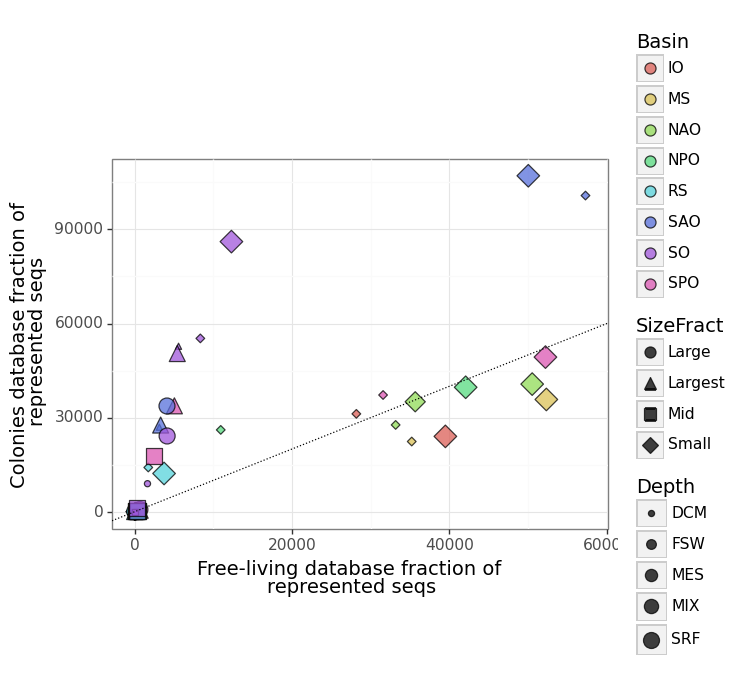

<ggplot: (2933119303894)>

In [53]:
(plotnine.ggplot(pivoted_table) + plotnine.geom_point(plotnine.aes(x = "free_phaeo",
                                                          y = "colonies_phaeo",
                                                          fill = "Basin",
                                                          shape = "SizeFract",
                                                          size="Depth"),alpha=0.75) + 
    plotnine.geom_abline(plotnine.aes(intercept=0,slope=1),linetype="dotted") + 
    plotnine.theme_bw(base_size=14) + plotnine.ylab("Colonies database fraction of \nrepresented seqs")+
    plotnine.xlab("Free-living database fraction of \nrepresented seqs")+ 
    plotnine.guides(fill = plotnine.guide_legend(override_aes = {"size":4}),
                    shape = plotnine.guide_legend(override_aes = {"size":4})))

/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using alpha for a discrete variable is not advised.


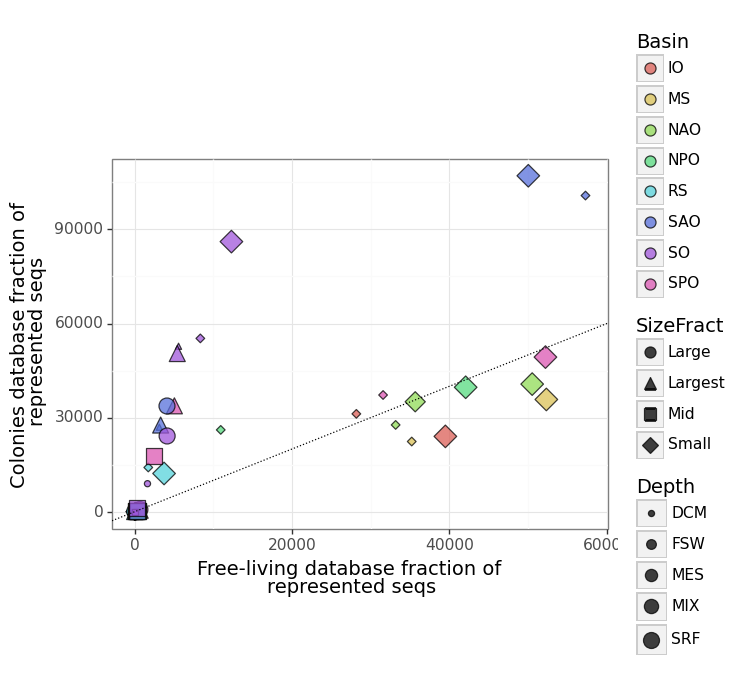

<ggplot: (2933036273421)>

In [30]:
(plotnine.ggplot(pivoted_table) + plotnine.geom_point(plotnine.aes(x = "free_phaeo",
                                                          y = "colonies_phaeo",
                                                          fill = "Basin",
                                                          shape = "SizeFract",
                                                          size="Depth"),alpha=0.75) + 
    plotnine.geom_abline(plotnine.aes(intercept=0,slope=1),linetype="dotted") + 
    plotnine.theme_bw(base_size=14) + plotnine.ylab("Colonies database fraction of \nrepresented seqs")+
    plotnine.xlab("Free-living database fraction of \nrepresented seqs")+ 
    plotnine.guides(fill = plotnine.guide_legend(override_aes = {"size":4}),
                    shape = plotnine.guide_legend(override_aes = {"size":4})))

In [58]:
combined_frame

,Domain,Phylum,Order,Family,Genus,PhaeoDB,TaraSample,transcript_name,TotalBySamp,Fraction,Basin,SizeFract,PercDiff
0,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SAO-all-SRF-0.8-5.00,163112,174694,0.933701,SAO,Small,-0.066299
1,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,colonies_phaeo,SAO-all-SRF-0.8-5.00,107086,174694,0.612992,SAO,Small,-0.387008
2,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_ant_jgi,SAO-all-SRF-0.8-5.00,71113,174694,0.407072,SAO,Small,-0.592928
3,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_pouchetii_CCB,SAO-all-SRF-0.8-5.00,69385,174694,0.397180,SAO,Small,-0.602820
4,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_globosa_jgi,SAO-all-SRF-0.8-5.00,65259,174694,0.373562,SAO,Small,-0.626438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93118,Eukaryota,Ochrophyta,Corethrales,Corethraceae,Corethron,P_globosa_jgi,RS-all-DCM-5-20.00,1,6,0.166667,RS,Mid,-0.833333
93119,Eukaryota,Ochrophyta,Corethrales,Corethraceae,Corethron,P_jahnii_ccmp2496,RS-all-DCM-5-20.00,1,6,0.166667,RS,Mid,-0.833333
93120,Eukaryota,Ciliophora,Scuticociliatia_1,Philasterida,Anophryoides,P_ant_jgi,RS-all-DCM-5-20.00,1,6,0.166667,RS,Mid,-0.833333
93121,Eukaryota,Ciliophora,Scuticociliatia_1,Philasterida,Anophryoides,P_antarctica_caron,RS-all-DCM-5-20.00,1,6,0.166667,RS,Mid,-0.833333


In [60]:
combined_frame_filt.to_csv("combined_frame_filt.csv")

/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.


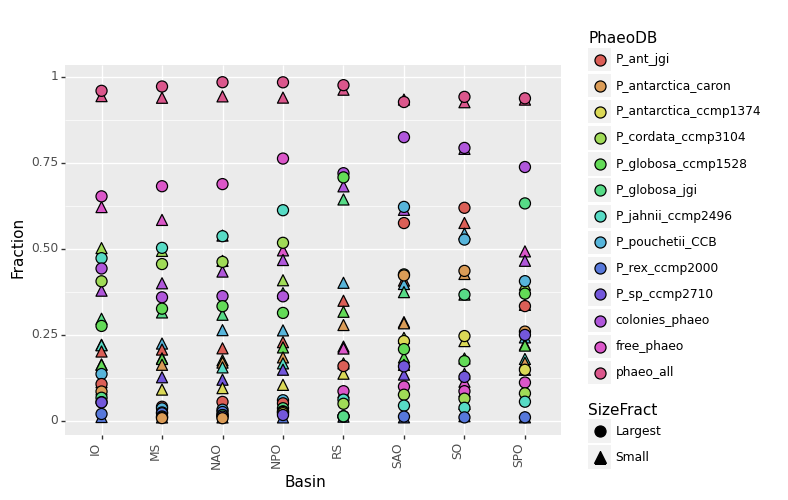

<ggplot: (2933119309075)>

In [59]:
combined_frame_filt = combined_frame.loc[[(str(curr) in ["Small","Largest"]) for curr in combined_frame.SizeFract],:]
(plotnine.ggplot(combined_frame_filt.loc[[(curr.strip()=="Phaeocystis")&("SRF" in currenv) for curr,
                                     currenv in zip(combined_frame_filt.Genus,
                                                    combined_frame_filt.TaraSample)],:])+
     plotnine.geom_point(plotnine.aes(x = "Basin", y = "Fraction", fill = "PhaeoDB", shape = "SizeFract"),
                         size=4)+
     plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxpl

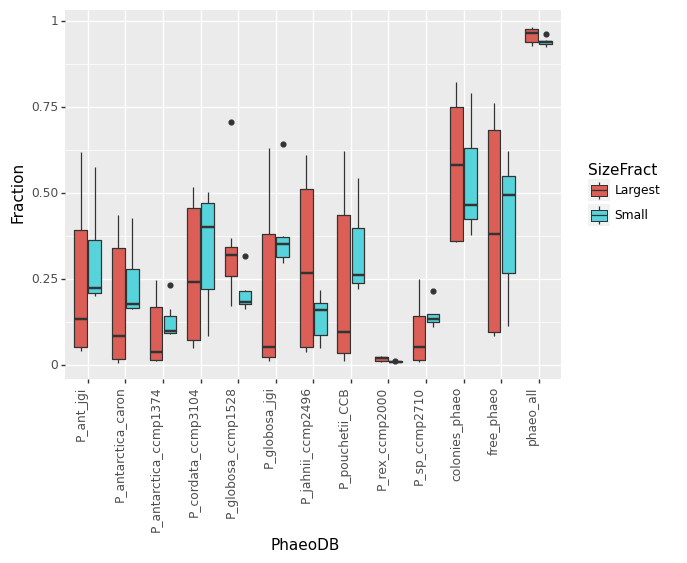

<ggplot: (2933119284206)>

In [56]:
combined_frame_filt = combined_frame.loc[[(str(curr) in ["Small","Largest"]) for curr in combined_frame.SizeFract],:]
(plotnine.ggplot(combined_frame_filt.loc[[(curr.strip()=="Phaeocystis")&("SRF" in currenv) for curr,
                                     currenv in zip(combined_frame_filt.Genus,
                                                    combined_frame_filt.TaraSample)],:])+
     plotnine.geom_boxplot(plotnine.aes(x = "PhaeoDB", y = "Fraction", fill = "SizeFract"))+
     plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxpl

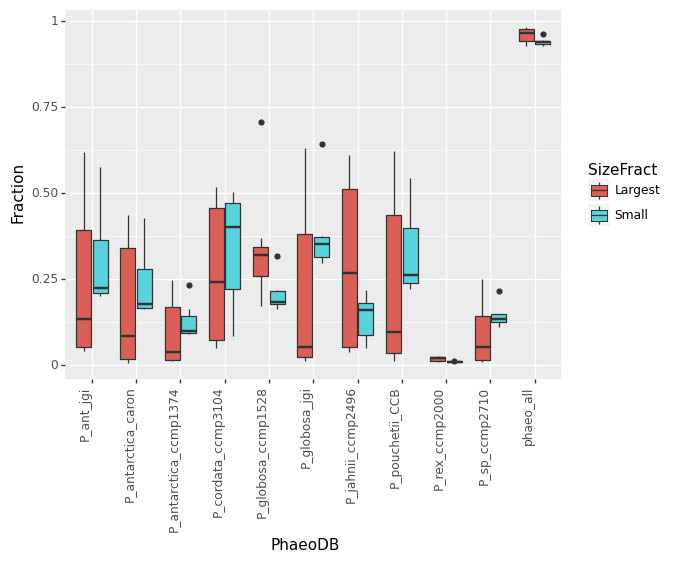

<ggplot: (2932953078203)>

In [28]:
combined_frame_filt = combined_frame.loc[[(str(curr) in ["Small","Largest"]) for curr in combined_frame.SizeFract],:]
(plotnine.ggplot(combined_frame_filt.loc[[(curr.strip()=="Phaeocystis")&("SRF" in currenv) for curr,
                                     currenv in zip(combined_frame_filt.Genus,
                                                    combined_frame_filt.TaraSample)],:])+
     plotnine.geom_boxplot(plotnine.aes(x = "PhaeoDB", y = "Fraction", fill = "SizeFract"))+
     plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxpl

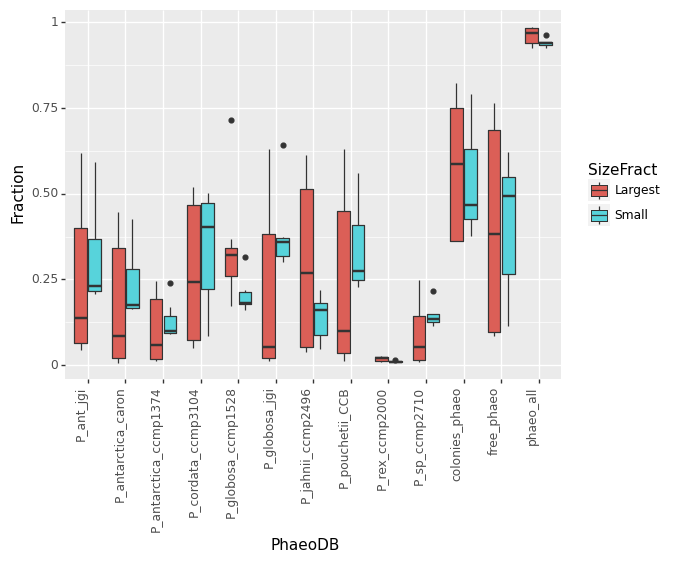

<ggplot: (2932042059283)>

In [29]:
combined_frame_filt = combined_frame.loc[[(str(curr) in ["Small","Largest"]) for curr in combined_frame.SizeFract],:]
(plotnine.ggplot(combined_frame_filt.loc[[(curr.strip()=="Phaeocystis")&("SRF" in currenv) for curr,
                                     currenv in zip(combined_frame_filt.Genus,
                                                    combined_frame_filt.TaraSample)],:])+
     plotnine.geom_boxplot(plotnine.aes(x = "PhaeoDB", y = "Fraction", fill = "SizeFract"))+
     plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxpl

/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats

/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/stats

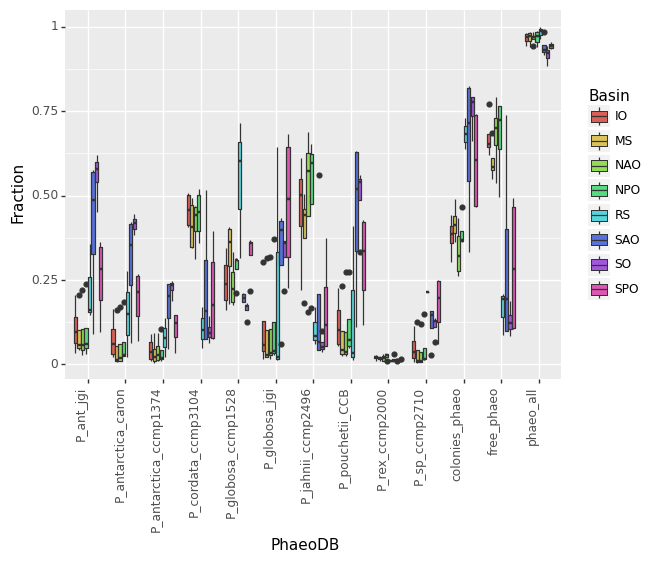

<ggplot: (2934126200092)>

In [134]:
(plotnine.ggplot(combined_frame.loc[[(curr.strip()=="Phaeocystis")&("SRF" in currenv) for curr,
                                     currenv in zip(combined_frame.Genus,combined_frame.TaraSample)],:])+
     plotnine.geom_boxplot(plotnine.aes(x = "PhaeoDB", y = "Fraction", fill = "Basin"))+
     plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

In [31]:
all_phaeo_seqs_bidir.to_csv("all_phaeo_seqs_bidir.csv")

In [30]:
all_phaeo_seqs_bidir.head()

,Unnamed: 0.1,Unnamed: 0,transcript_name,classification_level,full_classification,classification,max_pid,ambiguous,counts,PhaeoDB,TaraSample,Domain,Supergroup,Phylum,Class,Order,Family,Genus,Species
0,0,0,k119_2928157_1,class,Bacteria; Proteobacteria; Alphaproteobacteria;...,Alphaproteobacteria,135.800,0.0,NaN,P_ant_jgi,NPO-all-DCM-180-2000.00,Bacteria,Proteobacteria,Alphaproteobacteria,Alphaproteobacteria,None,None,None,None
1,1,0,k119_4427412_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,46.366,0.0,NaN,P_ant_jgi,NPO-all-DCM-180-2000.00,Eukaryota,Hacrobia,Haptophyta,Prymnesiophyceae,Phaeocystales,Phaeocystaceae,Phaeocystis,None
2,2,0,k119_4722332_2,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,60.528,0.0,NaN,P_ant_jgi,NPO-all-DCM-180-2000.00,Eukaryota,Hacrobia,Haptophyta,Prymnesiophyceae,Phaeocystales,Phaeocystaceae,Phaeocystis,None
3,3,0,k119_5620325_1,domain,Eukaryota,Eukaryota,93.023,1.0,NaN,P_ant_jgi,NPO-all-DCM-180-2000.00,Eukaryota,None,None,None,None,None,None,None
4,4,0,k119_5765955_1,genus,Eukaryota; Hacrobia; Haptophyta; Prymnesiophyc...,Phaeocystis,90.404,0.0,NaN,P_ant_jgi,NPO-all-DCM-180-2000.00,Eukaryota,Hacrobia,Haptophyta,Prymnesiophyceae,Phaeocystales,Phaeocystaceae,Phaeocystis,None


In [32]:
combined_frame_filt.head()

,Domain,Phylum,Order,Family,Genus,PhaeoDB,TaraSample,transcript_name,TotalBySamp,Fraction,Basin,SizeFract,PercDiff
0,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,phaeo_all,SAO-all-SRF-0.8-5.00,163112,174718,0.933573,SAO,Small,-0.066427
1,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,colonies_phaeo,SAO-all-SRF-0.8-5.00,107086,174718,0.612908,SAO,Small,-0.387092
2,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_pouchetii_CCB,SAO-all-SRF-0.8-5.00,71797,174718,0.410931,SAO,Small,-0.589069
3,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_ant_jgi,SAO-all-SRF-0.8-5.00,71113,174718,0.407016,SAO,Small,-0.592984
4,Eukaryota,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,P_globosa_jgi,SAO-all-SRF-0.8-5.00,65259,174718,0.373510,SAO,Small,-0.626490
